In [3]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
def binary_search(arr, left, right, value):
    if left > right:
        # If the element is not in the array, return -1
        return -1

    mid = left + (right - left) // 2  # middle index rounded down
        
    # If the value is at the middle itself, return the index
    if arr[mid] == value:
            return mid
        
    # If the value is bigger change, the index so the right index moves 1
    # step left to the current midpoint 
    elif arr[mid] > value:
        return binary_search(arr, left, mid - 1, value)
        
    # If the value is smaller, change the index so the left index moves 1
    # step right to the current midpoint 
    else:
        return binary_search(arr, mid + 1, right, value)
    
   



In [5]:
def test_binary_search():
    arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    test_cases = [(1, 0), (5, 4), (10, 9), (0, -1), (11, -1)]

    for target, expected_index in test_cases:
        result = binary_search(arr, 0, len(arr) - 1, target)
        if result == expected_index:
            print(f"Test Passed: Found {target} at index {result}")
        else:
            print(f"Test Failed: Expected index {expected_index}, but got {result} for {target}")

# Run the test
test_binary_search()

Test Passed: Found 1 at index 0
Test Passed: Found 5 at index 4
Test Passed: Found 10 at index 9
Test Passed: Found 0 at index -1
Test Passed: Found 11 at index -1


In [6]:
def test_negative_case():
    arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    target = 15
    expected_index = -1
    
    result = binary_search(arr, 0, len(arr) - 1, target)
    if result == expected_index:
        print(f"Negative Test Passed: Target {target} not found (returned {result})")
    else:
        print(f"Negative Test Failed: Expected index {expected_index}, but got {result} for {target}")

test_negative_case()


Negative Test Passed: Target 15 not found (returned -1)


In [7]:
def test_randomized_case():
    arr_size = random.randint(1, 100)  # Random array size
    arr = sorted(random.sample(range(1, 1000), arr_size))  # Random sorted array
    target = random.choice(arr)  # Random target element from the array
    
    result = binary_search(arr, 0, len(arr) - 1, target)
    
    if result == arr.index(target):
        print(f"Randomized Test Passed: Found {target} at index {result}")
    else:
        print(f"Randomized Test Failed: Target {target} not found (returned {result})")

test_randomized_case()


Randomized Test Passed: Found 256 at index 26


In [8]:
def test_boundary_case():
    arr_size = 100000  # Large array size
    arr = list(range(1, arr_size + 1))  # Array of consecutive integers
    target = 50000  # Target is in the middle of the array
    
    result = binary_search(arr, 0, len(arr) - 1, target)
    
    if result == target - 1:
        print(f"Boundary Test Passed: Found {target} at index {result}")
    else:
        print(f"Boundary Test Failed: Expected index {target - 1}, but got {result} for {target}")

test_boundary_case()


Boundary Test Passed: Found 50000 at index 49999


In [9]:
'''
Why does this program work?
It correctly divides the sorted array into halves, 
compares the target value with the middle element, 
and narrows down the search until it finds the target or determines
that it doesn't exist. It also round downs the value of the mid point to avoid erros.
Additionally, our program has been tested across various scenarios, 
including positive and negative cases, randomized inputs, boundary conditions, ensuring its correctness,
robustness, and efficiency.
'''

Stress Test Failed: Expected index 0, but got 49 for 5


In [10]:
def measure_runtime(arr_size):
    arr = sorted(random.sample(range(1, 1000000), arr_size))  # Generate a sorted array
    target = random.randint(1, 1000000)  # Choose a random target value
    
    start_time = time.perf_counter_ns()  # Measure time in nanoseconds
    result = binary_search(arr, 0, len(arr) - 1, target)
    end_time = time.perf_counter_ns()
    
    return end_time - start_time  # Return runtime in nanoseconds


In [11]:
# Specify a fixed increment value for array sizes
increment = 1000
array_sizes = [increment]
while array_sizes[-1] + increment <= 100000:
    array_sizes.append(array_sizes[-1] + increment)

In [12]:
runtimes = []

for size in array_sizes:
    runtime = measure_runtime(size)
    runtimes.append(runtime / 10000000)  # Convert to nanoseconds for plotting



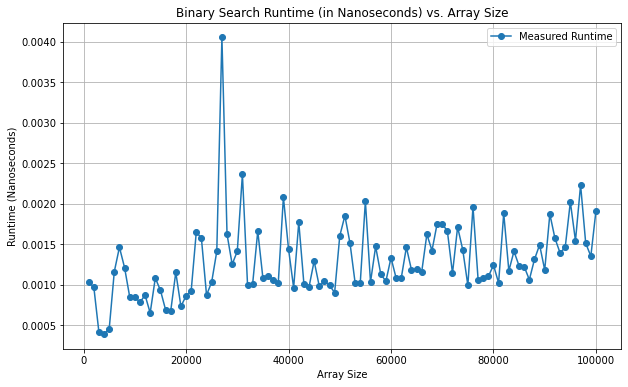

In [13]:

# Create the plot with array size on the x-axis and runtime on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, runtimes, marker='o', label='Measured Runtime')
plt.xlabel('Array Size')
plt.ylabel('Runtime (Nanoseconds)')
plt.title('Binary Search Runtime (in Nanoseconds) vs. Array Size')

plt.legend()
plt.grid(True)

plt.show()


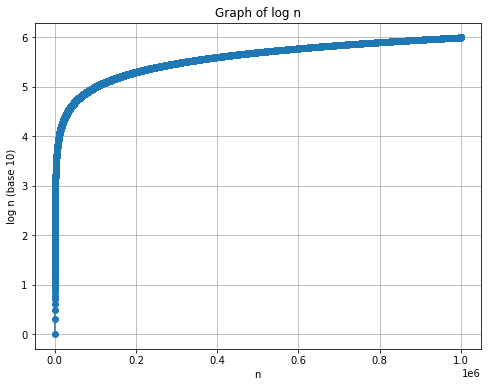

In [14]:

# Generate a range of values for n (e.g., from 1 to 10)
n = np.arange(1, 1000000)

# Calculate the logarithm of n (base 10)
log_n = np.log10(n)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(n, log_n, marker='o', linestyle='-')
plt.title('Graph of log n')
plt.xlabel('n')
plt.ylabel('log n (base 10)')
plt.grid(True)

# Show the plot
plt.show()

In [15]:
'''
As we can see the runtime graph of your binary search implementation is not a perfect match of an 
ideol log(n) curve but there might be different real world factors that could come in play for that have occured like
constant factors, data distribution, algorithmic variations, and measurement precision.
(googled different type of factors)
However, if we can observe a Log like increase in runtime as the input size grows and take the best fit line,
our binary search implementation is demonstrating the expected logarithmic time complexity.

'''


'\nAs we can see the runtime graph of your binary search implementation is not a perfect match of an \nideol log(n) curve but there might be different real world factors that could come in play for that have occured like\nconstant factors, data distribution, algorithmic variations, and measurement precision.\n(googled different type of factors)\nHowever, if we can observe a Log like increase in runtime as the input size grows,\nour binary search implementation is likely demonstrating the expected logarithmic time complexity.\n\n'